## Probability
### Basic Probability Theory

In [14]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch.distributions import multinomial

In [15]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [16]:
# 多次采样
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 1., 0., 4., 2.])

In [17]:
# 1/6 = 0.167
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1780, 0.1720, 0.1630, 0.1560, 0.1750, 0.1560])

In [18]:
#可视化过程
# 抽500次 每次10个
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)

counts,cum_counts,cum_counts.sum(dim=1, keepdims=True)


(tensor([[1., 4., 0., 1., 2., 2.],
         [0., 1., 3., 3., 2., 1.],
         [4., 3., 1., 0., 1., 1.],
         ...,
         [4., 2., 2., 0., 1., 1.],
         [1., 4., 0., 0., 3., 2.],
         [1., 4., 3., 1., 1., 0.]]),
 tensor([[  1.,   4.,   0.,   1.,   2.,   2.],
         [  1.,   5.,   3.,   4.,   4.,   3.],
         [  5.,   8.,   4.,   4.,   5.,   4.],
         ...,
         [855., 819., 808., 826., 844., 828.],
         [856., 823., 808., 826., 847., 830.],
         [857., 827., 811., 827., 848., 830.]]),
 tensor([[  10.],
         [  20.],
         [  30.],
         [  40.],
         [  50.],
         [  60.],
         [  70.],
         [  80.],
         [  90.],
         [ 100.],
         [ 110.],
         [ 120.],
         [ 130.],
         [ 140.],
         [ 150.],
         [ 160.],
         [ 170.],
         [ 180.],
         [ 190.],
         [ 200.],
         [ 210.],
         [ 220.],
         [ 230.],
         [ 240.],
         [ 250.],
         [ 260.],
        

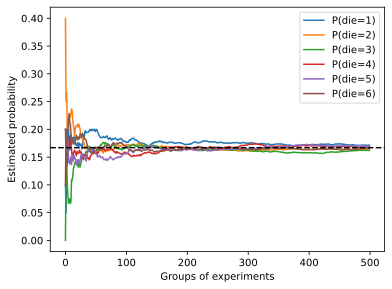

In [19]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=("P(die="+ str(i+1)+")"))
# 画一条标准0.167线
d2l.plt.axhline(y =0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

### Exercises

3. 假设有三个随机变量A,B,C,B只取决于A，C只取决与B，求联合概率P(A,B,C)

问题三
$P(A,B,C) = p(BC|A)P(A) = P(C|A,B)P(B|A)P(A)$